## Railway Analysis objectives: 
- Identify the most popular routes
- Determine peak travel times
- Analyze revenue from different ticket types & classes
- Diagnose on-time performance and contributing factors

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib as mb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
#to read the file and create a dataframe:
df = pd.read_csv('/home/maryna/Datasets/railway.csv')
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [4]:
#dataset summary statistics:
df.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [5]:
#to check the dataframe for null values:
df.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

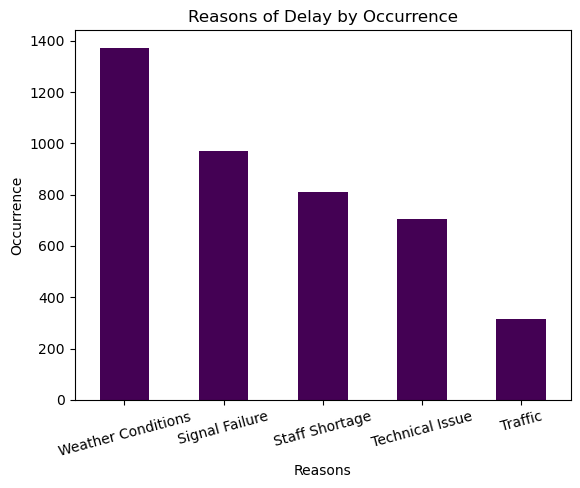

In [20]:
#To replace duplicated values in dataframe. Created a copy of an original dataframe and replaced values with the .replace method.
df['Reason for Delay'].value_counts()
df1 = df.copy()
df1['Reason for Delay'].replace('Signal failure', 'Signal Failure', inplace = True)
df1['Reason for Delay'].replace('Weather', 'Weather Conditions', inplace = True)
df1['Reason for Delay'].replace('Staffing', 'Staff Shortage', inplace = True)


#To visualise the results in a bar chart: 
reasons = df1['Reason for Delay'].value_counts()
reasons.plot(kind='bar', colormap='viridis')
plt.title('Reasons of Delay by Occurrence')
plt.xlabel('Reasons')
plt.ylabel('Occurrence')
plt.xticks(rotation=15)
plt.show()


# Identify the most popular routes

In [7]:
#To identify the most popular routes: 
routes = df1.groupby(['Departure Station','Arrival Destination'])['Arrival Destination'].count().sort_values(ascending=False)
#print(routes.reset_index(name='count').to_string())
routes.head()

Departure Station      Arrival Destination  
Manchester Piccadilly  Liverpool Lime Street    4628
London Euston          Birmingham New Street    4209
London Kings Cross     York                     3922
London Paddington      Reading                  3873
London St Pancras      Birmingham New Street    3471
Name: Arrival Destination, dtype: int64

# Determine peak travel times

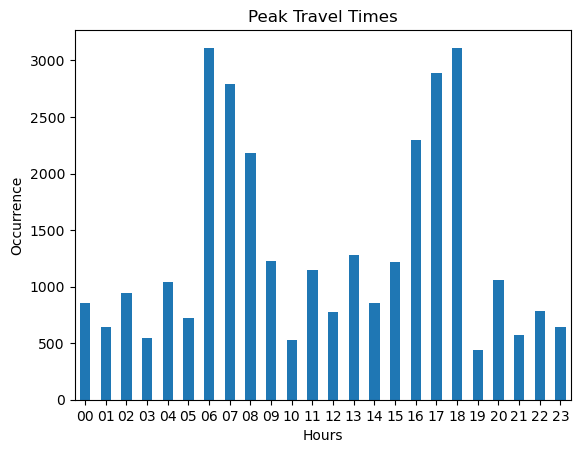

In [21]:
# To determine peak travel times:
hours = df1['Departure Time'].str.slice(0,2)
hours = hours.value_counts().sort_index()

#To visualize the results: 
hours.plot(kind='bar')
plt.title('Peak Travel Times')
plt.xlabel('Hours')
plt.ylabel('Occurrence')
plt.xticks(rotation=0)
plt.show()

# Analyze revenue from different ticket types & classes

  Ticket Class Ticket Type  Revenue
0     Standard     Advance   242388
1     Standard    Off-Peak   178666
2     Standard     Anytime   171468
3  First Class     Advance    66886
4  First Class    Off-Peak    44672
5  First Class     Anytime    37841


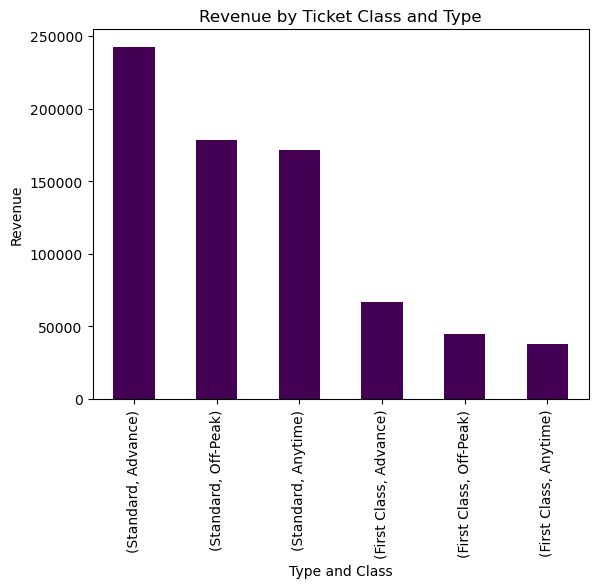

In [27]:
#Analyze revenue from different ticket types & classes

revenue_grouped = df1.groupby(['Ticket Class','Ticket Type'])['Price'].sum().sort_values(ascending=False)
print(revenue_grouped.reset_index(name='Revenue').to_string())

#To visualize the results:
revenue_grouped.plot(kind='bar', colormap='viridis')
plt.title('Revenue by Ticket Class and Type')
plt.xlabel('Type and Class')
plt.ylabel('Revenue')
plt.show()




# Diagnose on-time performance and contributing factors

In [10]:
# Diagnose on-time performance and contributing factors

delayed = df1[df1['Journey Status'] == "Delayed"]

delayed['Actual Arrival Time'] = pd.to_datetime(delayed['Date of Journey'] +' '+ delayed['Actual Arrival Time'], format='%Y-%m-%d %H:%M:%S')
delayed['Arrival Time'] = pd.to_datetime(delayed['Date of Journey'] +' '+ delayed['Arrival Time'], format='%Y-%m-%d %H:%M:%S')
delayed['Late Time'] = delayed['Actual Arrival Time'] - delayed['Arrival Time']


0 days 00:42:12.801047120
Departure Station      Arrival Destination  
Manchester Piccadilly  Leeds                      0 days 02:23:44.062500
York                   Doncaster               0 days 01:08:55.555555555
Manchester Piccadilly  Liverpool Lime Street   0 days 01:07:12.203389830
London Euston          Birmingham New Street   0 days 00:54:57.520661157
Manchester Piccadilly  Nottingham              0 days 00:53:47.142857142
Liverpool Lime Street  London Paddington       0 days 00:38:23.076923076
                       London Euston           0 days 00:36:34.692307692
London Euston          York                    0 days 00:36:21.176470588
London Paddington      Reading                 0 days 00:35:37.272727272
Birmingham New Street  London Euston           0 days 00:31:09.545454545
York                   Durham                     0 days 00:30:26.250000
Birmingham New Street  Manchester Piccadilly      0 days 00:26:07.500000
Manchester Piccadilly  London Euston              0 d

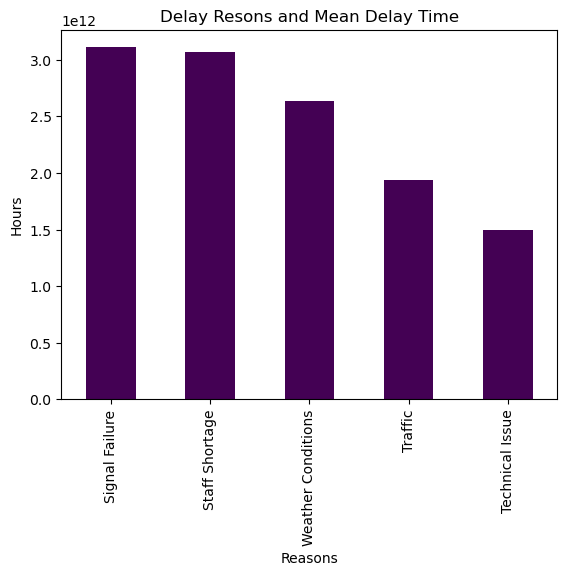

Departure Station      Arrival Destination    Reason for Delay  
Birmingham New Street  London Euston          Staff Shortage       0 days 00:11:09.230769230
                                              Weather Conditions   0 days 00:39:32.903225806
                       Manchester Piccadilly  Technical Issue         0 days 00:26:07.500000
Edinburgh Waverley     London Kings Cross     Staff Shortage       0 days 00:15:16.470588235
Liverpool Lime Street  London Euston          Signal Failure                 0 days 00:36:05
                                              Staff Shortage       0 days 00:36:39.183673469
                                              Technical Issue      0 days 00:20:02.589928057
                                              Traffic                        0 days 00:20:18
                                              Weather Conditions   0 days 00:42:10.795454545
                       London Paddington      Staff Shortage       0 days 00:38:23.076923076
     

In [28]:
#Mean delay time 
print(delayed['Late Time'].mean())

#Mean delay time by a route:
print(delayed.groupby(['Departure Station','Arrival Destination'])['Late Time'].mean().sort_values(ascending=False))

# #Mean delay time by a reason of delay:
delay_reasons_time = delayed.groupby(['Reason for Delay'])['Late Time'].mean().sort_values(ascending=False)

delay_reasons_time.plot(kind='bar', colormap='viridis')
plt.title('Delay Resons and Mean Delay Time')
plt.xlabel('Reasons')
plt.ylabel('Hours')
plt.show()


#Mean delay time by a reason and a route:
print(delayed.groupby(['Departure Station','Arrival Destination','Reason for Delay'])['Late Time'].mean().sort_index())

# To analyze the common Purchase Types and Payment Methods

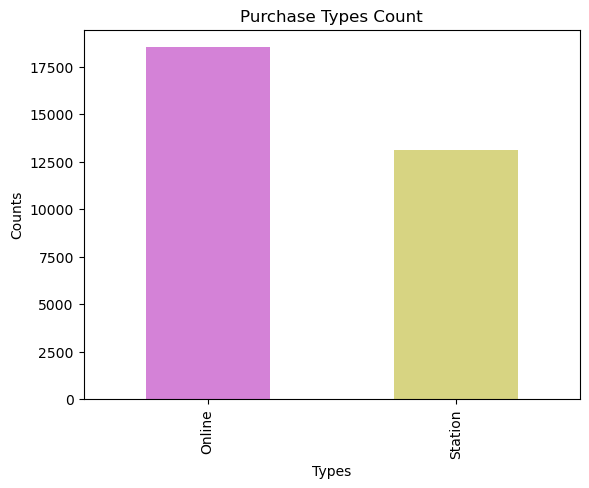

In [12]:
#To count Purchase Types: 
ptypes = df1['Purchase Type'].value_counts()
pcolors = ['#D482D7','#D7D482']
ptypes.plot(kind='bar', color = pcolors)
plt.title('Purchase Types Count')
plt.xlabel('Types')
plt.ylabel('Counts')
plt.show()

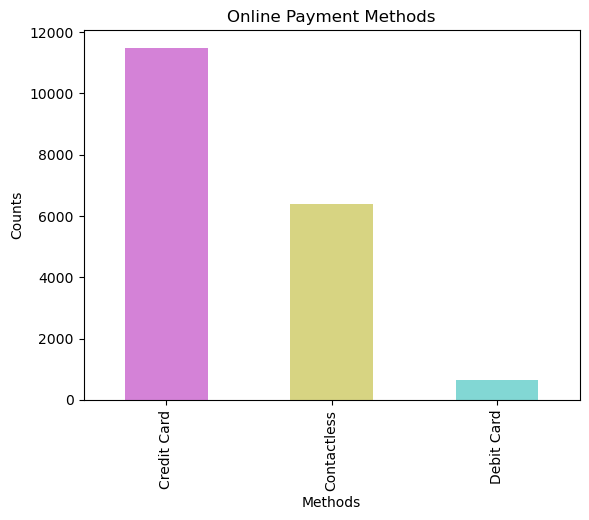

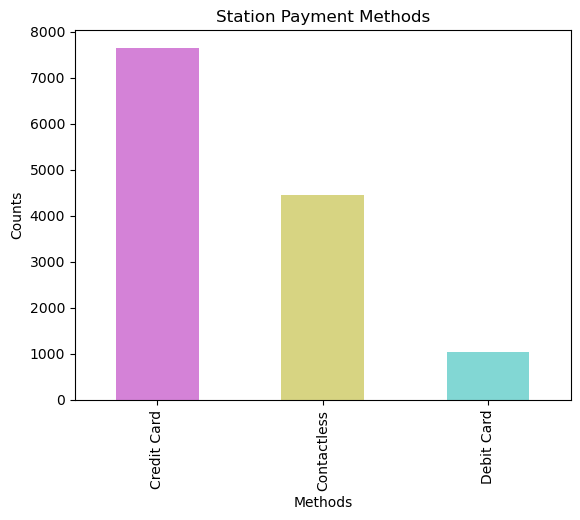

In [13]:
#To count how many Online customers paid by a CC, DC, or Contactless: 
online = df1[df1['Purchase Type'] == "Online"]['Payment Method'].value_counts()
ocolors = ['#D482D7','#D7D482','#82D7D4']
online.plot(kind='bar', color = ocolors)
plt.title('Online Payment Methods')
plt.xlabel('Methods')
plt.ylabel('Counts')
plt.show()

#To count how many Offline customers paid by a CC, DC, or Contactless:
station = df1[df1['Purchase Type'] == "Station"]['Payment Method'].value_counts()
ocolors = ['#D482D7','#D7D482','#82D7D4']
station.plot(kind='bar', color = ocolors)
plt.title('Station Payment Methods')
plt.xlabel('Methods')
plt.ylabel('Counts')
plt.show()

### Delay Insights
The most common reasons for delay are Weather conditions and Signal Failure. 
Signal failure and Staff  Shortage cause on average 3 hours of delay, while weather conditions cause delay over 2.5 hours. Company should check signals on the route and possibly hire more personnel to decrease staff shortage. 
The routes with the most delay times are: Manchester Piccadilly – Leeds with 2 hours 23 minutes of average delay, York – Doncaster with 1 hour and 8 minutes of average delay, and Manchester Piccadilly - Liverpool Lime Street with 1 hour and 7 minutes of average delay. 
Almost all routes with departure station in Manchester Piccadilly have delay time over 30 minutes. The company should investigate possible signal failures and staff shortages on this route. 

### Revenue and Payments Insights
Tickets are more often bought online, than in Stations. Both online and in Station customers prefer paying with credit card over Contactless payment method or Debit card. 

Standard class tickets generate the most revenue for the company. The most popular tickets are Standard class type Advance which brought 242,388 pounds in revenue. After Standard-Advance, goes Standard-Off-Peak with 178,666 pounds in revenue and Standard-Anytime with 171,468 pounds in revenue. Taking this information into consideration, the company should improve services for Standard class customers. 

